Data Preview:
        date  store  item  sales
0 2013-01-01      1     1     13
1 2013-01-02      1     1     11
2 2013-01-03      1     1     14
3 2013-01-04      1     1     13
4 2013-01-05      1     1     10

Missing values:
 date     0
store    0
item     0
sales    0
dtype: int64

Data types:
 date     datetime64[ns]
store             int64
item              int64
sales             int64
dtype: object


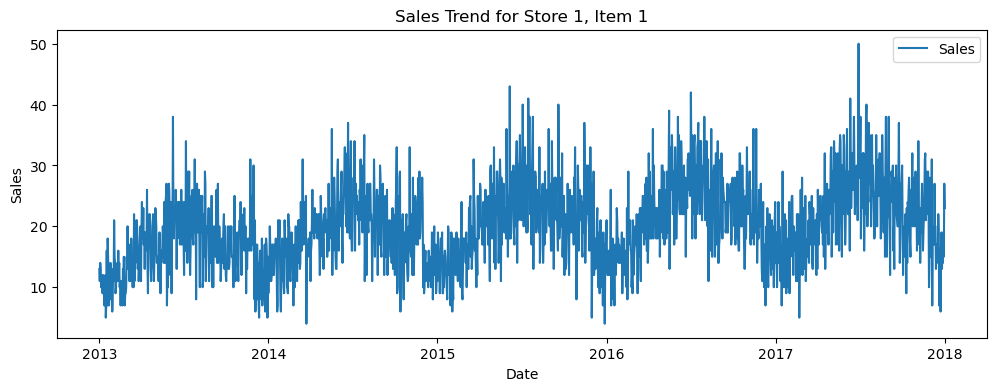

C:\Users\dhair\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


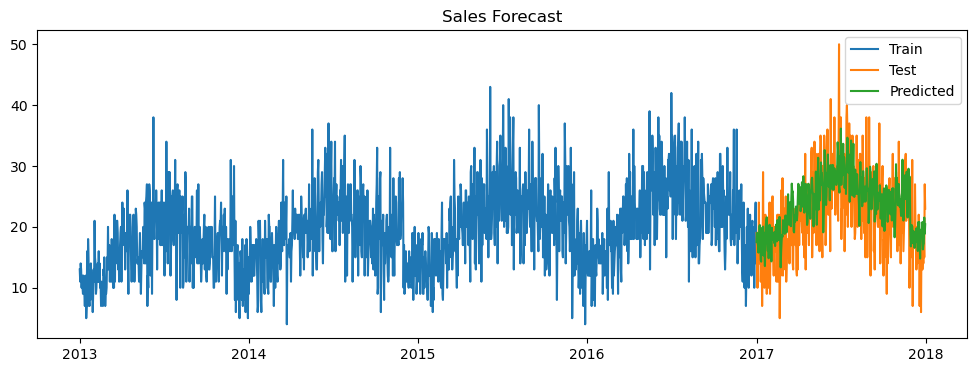

Root Mean Squared Error: 6.08


In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import numpy as np

# Step 1: Load the dataset
df = pd.read_csv("train.csv", parse_dates=['date'])
print("Data Preview:")
print(df.head())

# Step 2: Basic data exploration
print("\nMissing values:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)

# Step 3: Filter data for 1 store and 1 item (simplifies time series)
store_id = 1
item_id = 1
data = df[(df['store'] == store_id) & (df['item'] == item_id)].copy()

# Step 4: Set the date as the index
data.set_index('date', inplace=True)
data = data.sort_index()

# Step 5: Plotting the sales data
plt.figure(figsize=(12, 4))
plt.plot(data['sales'], label='Sales')
plt.title(f'Sales Trend for Store {store_id}, Item {item_id}')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

# Step 6: Train-test split
split_date = '2017-01-01'
train = data.loc[:split_date]
test = data.loc[split_date:]

# Step 7: Forecast using Exponential Smoothing (Holt-Winters)
model = ExponentialSmoothing(
    train['sales'], 
    trend='add', 
    seasonal='add', 
    seasonal_periods=365  # since data is daily, 365 for yearly seasonality
).fit()

predictions = model.forecast(len(test))

# Step 8: Plot predictions vs actual
plt.figure(figsize=(12, 4))
plt.plot(train.index, train['sales'], label='Train')
plt.plot(test.index, test['sales'], label='Test')
plt.plot(test.index, predictions, label='Predicted')
plt.title('Sales Forecast')
plt.legend()
plt.show()

# Step 9: Evaluation
rmse = np.sqrt(mean_squared_error(test['sales'], predictions))
print(f"Root Mean Squared Error: {rmse:.2f}")


In [2]:
# Create a DataFrame for visualization
visual_df = pd.DataFrame({
    'date': test.index,
    'actual_sales': test['sales'].values,
    'predicted_sales': predictions.values
})

# Save to CSV
visual_df.to_csv("sales_forecast_output.csv", index=False)

print("✅ Data exported successfully to 'sales_forecast_output.csv'")


✅ Data exported successfully to 'sales_forecast_output.csv'
